## Automatic Speech Recognition(ASR) for Swahili.

### Business understanding.

Automatic speech recognition (ASR) is a computer speech recognition that enables a program to process human speech into written format. A Swahili ASR is, therefore, capable of converting Swahili speech to written format. Such a program will be of use to swahili Speakers and can be used in various applications, for instance, search by voice on websites and building of virtual assistant technology based on the ASR model. Swahili language spoken in various countries especially in East and Central Africa. The Swahili ASR will be of use to many people. Consequently, the aim of this project will be to build an Automatic Speech Recognition Model for the Swahili language and deploy as a web service using flask.

### Data understanding

The data that will be used in this project was obtained from [Mozilla Common Voice](https://commonvoice.mozilla.org/en/datasets). It contains thousands of audios in Swahili and their corresponding transcripitions. The audios are diverse to ensure that the model is trained on various voices and avoid building a biased model. The corresponding transcriptions will also be used to train the model. An extra fine-tuned Swahili language model will be used to improve the models output and ensure that the written format is as close as possible to the speech.

### Exploring the dataset

In [1]:
# Importing the relevant libraries
import pandas as pd
# Loading the dataset with transcirpitions
transcriptions = pd.read_csv("train.tsv",sep ="\t",low_memory = False)
transcriptions.head(5)

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0133d8ddf5c1a3c678fde017e0b07d2835bfd707d5b3ec...,common_voice_sw_31428161.mp3,wachambuzi wa soka wanamtaja Messi kama nyota ...,2,0,twenties,female,NaN,NaN,sw,NaN
1,41ba4752c376dc7f0502f9c97728bf2f54e47972f3b6e4...,common_voice_sw_30356664.mp3,wachambuzi wa soka wanamtaja Messi kama nyota ...,2,0,fourties,female,NaN,NaN,sw,NaN
2,01c95772efd3fbe4a1122206c7474c77ed6591c8c9fb00...,common_voice_sw_30317714.mp3,romario aliingia kwenye orodha ya wachezaji wa...,2,1,NaN,NaN,NaN,NaN,sw,NaN
3,055aa825d52f0b81c0861c88ba4999b8bf91b92e90866c...,common_voice_sw_30055356.mp3,romario aliingia kwenye orodha ya wachezaji wa...,2,1,twenties,female,NaN,NaN,sw,NaN
4,0244639ffd7ec755a01b21ea204735ca3c44443e9cf46c...,common_voice_sw_29002392.mp3,Inajulikana kama shina la Warangi.,2,0,NaN,NaN,NaN,NaN,sw,NaN


In [2]:
# Exploring the length of the tsv file
print(len(transcriptions))

82070


In [3]:
# Exploring how many transcriptions have down votes greater than zero
len(transcriptions[transcriptions["down_votes"]>0])

26616

In [4]:
# Exploring how many transcriptions have down votes greater than one
len(transcriptions[transcriptions["down_votes"]>1])

3845

In [5]:
# Exploring how many transcriptions have down votes greater than two
len(transcriptions[transcriptions["down_votes"]>2])

1271

In [6]:
transcriptions[transcriptions["up_votes"]==0]

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment


In [7]:
transcriptions[transcriptions["up_votes"]==1]

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment


From the above outputs it can be seen that all audios have an up_vote greater than one. However, on sampling some of the audios with down_votes it can be realised that most audios with down_votes of two or less are okay. However, one audio with a down_vote of five seemed to have a lot of noise. Therefore, as a rule of thumb, we can avoid audios with a down_vote greater than two.

In [8]:
# Exploring the variability of the dataset on the basis of age
transcriptions['age'].value_counts()

twenties    36762
thirties     7462
fourties     4001
fifties      3865
sixties       506
teens         100
Name: age, dtype: int64

<Axes: >

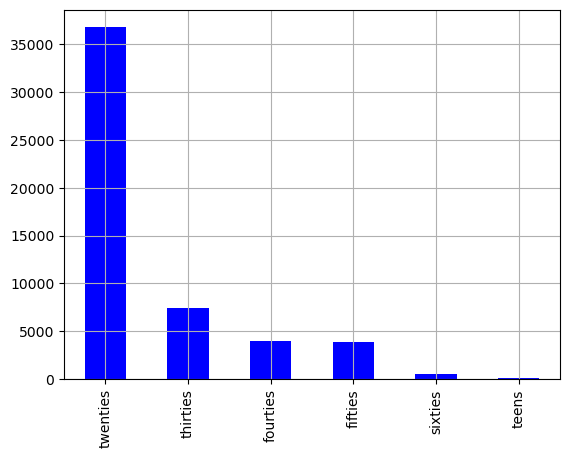

In [9]:
# Plotting the variability on the basis of age
transcriptions['age'].value_counts().plot(kind='bar',grid=True,colormap='winter')

The data seems to be diverse and tries to capture the voices of most age groups.However the teens and sixties audios are not that much.

In [10]:
# Exploring the variability of the dataset on the basis of gender
transcriptions['gender'].value_counts()

female    30325
male      23549
other        36
Name: gender, dtype: int64

<Axes: >

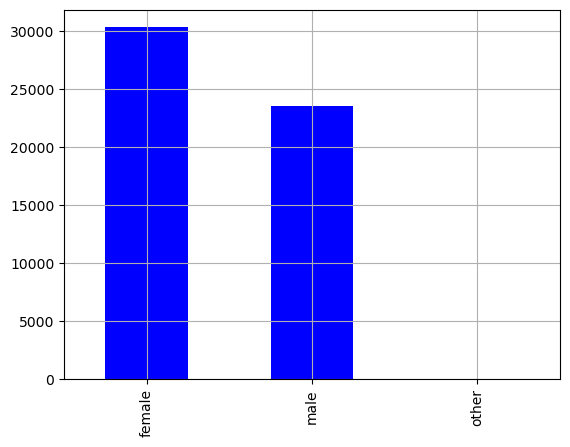

In [11]:
# Plotting the variability of the dataset on the basis of gender
transcriptions['gender'].value_counts().plot(kind='bar',grid=True,colormap='winter')

The data captures the gender audiod in a seemingly unbiased manner

In [12]:
# Exploring to see if the dataset contains audios with a different locale than Swahili
transcriptions['locale'].unique()

array(['sw'], dtype=object)

Only Swahili audios are used as it should be, since we are building a Swahili ASR 

### Data preprocessing

In [13]:
# Taking a look at the dataset
transcriptions.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,0133d8ddf5c1a3c678fde017e0b07d2835bfd707d5b3ec...,common_voice_sw_31428161.mp3,wachambuzi wa soka wanamtaja Messi kama nyota ...,2,0,twenties,female,NaN,NaN,sw,NaN
1,41ba4752c376dc7f0502f9c97728bf2f54e47972f3b6e4...,common_voice_sw_30356664.mp3,wachambuzi wa soka wanamtaja Messi kama nyota ...,2,0,fourties,female,NaN,NaN,sw,NaN
2,01c95772efd3fbe4a1122206c7474c77ed6591c8c9fb00...,common_voice_sw_30317714.mp3,romario aliingia kwenye orodha ya wachezaji wa...,2,1,NaN,NaN,NaN,NaN,sw,NaN
3,055aa825d52f0b81c0861c88ba4999b8bf91b92e90866c...,common_voice_sw_30055356.mp3,romario aliingia kwenye orodha ya wachezaji wa...,2,1,twenties,female,NaN,NaN,sw,NaN
4,0244639ffd7ec755a01b21ea204735ca3c44443e9cf46c...,common_voice_sw_29002392.mp3,Inajulikana kama shina la Warangi.,2,0,NaN,NaN,NaN,NaN,sw,NaN


In [14]:
# Dropping irrelevant columns
transcriptions.drop(['age','gender','accents','variant','locale','segment'],axis=1,inplace=True)

In [15]:
transcriptions.columns

Index(['client_id', 'path', 'sentence', 'up_votes', 'down_votes'], dtype='object')

#### Dealing with missing values

In [16]:
# Checking for missing values
transcriptions.isna().sum()

client_id     0
path          0
sentence      0
up_votes      0
down_votes    0
dtype: int64

The new dataset has no missing values.

#### Dealing with duplicates

While duplicated data can be advantageuous since it helps increase the size of the dataset, it can result in a biased model in extreme situations.We can define a duplicate has having the same client_id sentence and or path. We will therefore check for duplicates while subsetting it to the said columns.If there are duplicates in extreme levels we will have to drop them.

In [17]:
# Checking for duplicates with client_id and sentence as the subset
transcriptions.duplicated(subset=['client_id','sentence']).sum()

0

In [18]:
# Checking for duplicates with path as the subset
transcriptions.duplicated(subset=['path']).sum()

0

The dataset has no duplicates. We can now create a dataframe containing only the transcriptions(text) and the path.

In [19]:
transcriptions_df = pd.DataFrame(transcriptions[['sentence','path']])
transcriptions_df.head()

,sentence,path
0,wachambuzi wa soka wanamtaja Messi kama nyota ...,common_voice_sw_31428161.mp3
1,wachambuzi wa soka wanamtaja Messi kama nyota ...,common_voice_sw_30356664.mp3
2,romario aliingia kwenye orodha ya wachezaji wa...,common_voice_sw_30317714.mp3
3,romario aliingia kwenye orodha ya wachezaji wa...,common_voice_sw_30055356.mp3
4,Inajulikana kama shina la Warangi.,common_voice_sw_29002392.mp3
